In [1]:
import pandas as pd
s = pd.Series([95,90,85,90,95])
s

0    95
1    90
2    85
3    90
4    95
dtype: int64

In [2]:
import pandas as pd
s = pd.Series([4,3.5,3.8,3,3.7])
s = pd.Series


In [3]:
import numpy as np
import pandas as pd
arr = np.arange(12).reshape(4,3)
print(arr)
df = pd.DataFrame(arr)
df

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


,0,1,2
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11


In [4]:
filename = r'C:\Users\user\Desktop\my_ws\edu\data_analysis\1023_pandas_mat\1023_file\mobile.csv'
#경로앞에 r 붙이면 그대로 인식
df = pd.read_csv(filename, index_col=0) #첫번째 열을 인덱스로 사용.
df

,Color,price
Brand,,
Samsung,Black,100
LG,Gold,70
Apple,Silver,150
Apple,Gray,120


In [5]:
filename = r'C:\Users\user\Desktop\my_ws\edu\data_analysis\1023_pandas_mat\1023_file\weather.csv'
df = pd.read_csv(filename)
df.shape # 행과 열의 수를 알려줌
df.head() # 처음부터 5번째까지 정보를 알려줌
df.tail() # 끝에서 5번째까지 정보를 알려줌
df.index # 시작인덱스와 끝 인덱스 그리고 인덱스 단위를 알려줌
df.columns # 열을 알려줌
df.describe() # 컬럼별 요약 통계랑 
df['temp'].mean() # 평균 값 구하기
df.sort_values(by='max_wind') # 오름차순 정렬
df.sort_values(by = 'max_wind',ascending=False) # 내림차순 정렬


,date,temp,max_wind,mean_wind
2988,2018-10-06,19.4,26.0,7.0
3340,2019-09-23,15.0,25.8,11.0
1850,2015-08-25,20.1,25.3,14.9
3339,2019-09-22,15.7,23.1,11.9
1851,2015-08-26,17.4,22.6,8.1
...,...,...,...,...
1514,2014-09-23,20.7,2.0,1.0
559,2012-02-11,-0.7,NaN,NaN
560,2012-02-12,0.4,NaN,NaN
561,2012-02-13,4.0,NaN,NaN


In [6]:
filename = r'C:\Users\user\Desktop\my_ws\edu\data_analysis\1023_pandas_mat\1023_file\Bank.csv'
bank = pd.read_csv(filename)
bank['job'].value_counts() ## 빈도 분석 결과!
bank['job'].value_counts(ascending=True) 
bank['job'].unique()


array(['management', 'technician', 'blue-collar', 'retired', 'services',
       'admin.', 'entrepreneur', 'self-employed', 'unemployed', 'student',
       nan, 'housemaid'], dtype=object)

In [7]:
df.loc[:,['date','temp']] ## 문자열 넣을 때
df.iloc[:,[0,1]] ## 숫자 넣을 떄
df[0:3] #0부터 3개의 행을 출력 0~2
df.index=df['date']
df.loc['2010-08-01',['temp','mean_wind']]
df.iloc[3]
df.iloc[1:3,0:2]
w= df['temp']>=30
df[w]
w=(df['temp']>=30) & (df['max_wind']>=9)
df[w]
df[df['max_wind'].isna()] # 결측 데이터확인
df.isnull().sum() # 결측데이터 컬럼별 확인
df.fillna(0,inplace=True)
df.isnull().sum()


date         0
temp         0
max_wind     0
mean_wind    0
dtype: int64

In [8]:
filename= r'C:\Users\user\Desktop\my_ws\edu\data_analysis\1023_pandas_mat\1023_file\covid.csv'
covid = pd.read_csv(filename,encoding='euc-kr')

print(covid)
covid = pd.read_csv(filename,index_col=0,encoding='euc-kr')
print(covid)
covid[covid['사례수'] == covid['사례수'].max()]

newdata = covid.sort_values('증가',ascending=False)
newdata.head(3)




       항목  사례수    증가    감소  변화없음
0    스마트폰  999  78.9   1.7  19.4
1    텔레비전  965  68.5   3.9  27.6
2  개인용 PC  973  65.7   3.7  30.6
3  태블릿 PC  662  46.8   4.2  49.0
4     라디오  687  35.5  12.5  52.0
5    잡지·책  776  31.3  17.8  50.9
6    종이신문  552  17.6  23.2  59.2
        사례수    증가    감소  변화없음
항목                           
스마트폰    999  78.9   1.7  19.4
텔레비전    965  68.5   3.9  27.6
개인용 PC  973  65.7   3.7  30.6
태블릿 PC  662  46.8   4.2  49.0
라디오     687  35.5  12.5  52.0
잡지·책    776  31.3  17.8  50.9
종이신문    552  17.6  23.2  59.2


,사례수,증가,감소,변화없음
항목,,,,
스마트폰,999,78.9,1.7,19.4
텔레비전,965,68.5,3.9,27.6
개인용 PC,973,65.7,3.7,30.6


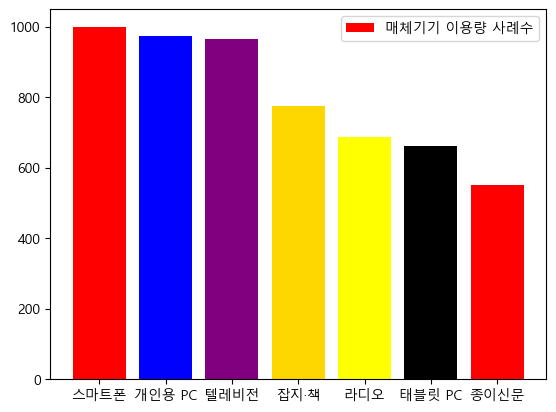

In [9]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgunbd.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

filename= r'C:\Users\user\Desktop\my_ws\edu\data_analysis\1023_pandas_mat\1023_file\covid.csv'

covid = pd.read_csv(filename, encoding='euc-kr')
covid = covid.sort_values(by=['사례수'],ascending=False)
x = covid['항목']
y = covid['사례수']
sizearr = covid['사례수']
colorarr = ['red','blue','purple','gold','yellow','black']
plt.bar(x,y,color=colorarr,label = '매체기기 이용량 사례수')
plt.legend(loc='upper right')
plt.show()

In [10]:
filename= r'C:\Users\user\Desktop\my_ws\edu\data_analysis\1023_pandas_mat\1023_file\vaccine.csv'

vac = pd.read_csv(filename, encoding='euc-kr')

print(vac.tail(5))
vac = vac.drop(['day1sum','day1rate','day2sum','day2rate'],axis=1)
print(vac.tail(5))
vac.describe()

           date  subject  day1num  day1sum  day1rate  day2num  day2sum  \
174  2021.04.25  1023346    23323   350631      34.2     3411    18513   
175  2021.04.24  1023346      200   350427      34.2        0    18513   
176  2021.04.23  1027740    10195   345764      33.6      119    18376   
177  2021.04.22  1023538    27074   317386      31.0     2479    15901   
178  2021.04.21  1019322    22501   291857      28.6     2358    13543   

     day2rate  
174       1.8  
175       1.8  
176       1.8  
177       1.6  
178       1.3  
           date  subject  day1num  day2num
174  2021.04.25  1023346    23323     3411
175  2021.04.24  1023346      200        0
176  2021.04.23  1027740    10195      119
177  2021.04.22  1023538    27074     2479
178  2021.04.21  1019322    22501     2358


,subject,day1num,day2num
count,1.790000e+02,179.000000,179.000000
mean,5.086644e+06,40078.150838,34096.636872
std,3.324235e+06,44231.469656,40745.688278
min,1.019322e+06,0.000000,0.000000
25%,2.279241e+06,4385.000000,4794.500000
50%,3.943320e+06,23323.000000,16581.000000
75%,9.505868e+06,71634.500000,50950.000000
max,9.795426e+06,169036.000000,200186.000000


In [11]:
file1 = r'C:\Users\user\Desktop\my_ws\edu\data_analysis\1023_pandas_mat\1023_file\signup.csv'
file2 = r'C:\Users\user\Desktop\my_ws\edu\data_analysis\1023_pandas_mat\1023_file\professor.csv'

df_signup = pd.read_csv(file1,encoding='euc-kr')
df_prof = pd.read_csv(file2,encoding='euc-kr')
df_sum = pd.merge(df_signup,df_prof,on='담당교수',how='left') # 공통 열을 기준으로 합치기
print(df_sum)
df_sum['학과'].value_counts() #특정 열의 갯수를 샌다


   수강코드    과목명 담당교수     학과
0   111    파이썬  양숙희  컴퓨터공학
1   222  데이터분석  오경선   인공지능
2   333   인공지능  장은실   정보통신
3   444   선형대수  황복동  컴퓨터공학
4   555   이산수학  정명식   인공지능
5   666  컴퓨터개론  최봉수    NaN
6   777   자료구조  김진영    NaN
7   888   정보통신  김진호    NaN


컴퓨터공학    2
인공지능     2
정보통신     1
Name: 학과, dtype: int64

In [12]:
file1 = r'C:\Users\user\Desktop\my_ws\edu\data_analysis\1023_pandas_mat\1023_file\iris.csv'

iris = pd.read_csv(file1,encoding='euc-kr')
print(iris)
iris.info() # 기본정보 확인
iris.describe() # 기초통계량 확인


     SepalLength  SepalWidth  PetalLength  PetalWidth    Species
0            5.1         3.5          1.4         0.2     setosa
1            4.9         3.0          1.4         0.2     setosa
2            4.7         3.2          1.3         0.2     setosa
3            4.6         3.1          1.5         0.2     setosa
4            5.0         3.6          1.4         0.2     setosa
..           ...         ...          ...         ...        ...
145          6.7         3.0          5.2         2.3  virginica
146          6.3         2.5          5.0         1.9  virginica
147          6.5         3.0          5.2         2.0  virginica
148          6.2         3.4          5.4         2.3  virginica
149          5.9         3.0          5.1         1.8  virginica

[150 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sep

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
print(iris['Species'].value_counts())
print(iris.isnull().sum())
print('중복데이터',iris.duplicated().sum())


setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64
SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64
중복데이터 1


In [14]:
print(iris[iris.duplicated(keep=False) == True])
#duplicated keep옵션 >  first, last, False 디폴트는 first 
#first는 첫행만 True리턴, last는 마지막행만 True 리턴, False는 모두 True리턴
iris2 = iris.drop_duplicates() #디폴트 값은 first값 삭제
print('중복 값 삭제 후 \n')
print('중복된 값',iris2.duplicated().sum())
print(iris2.info)


     SepalLength  SepalWidth  PetalLength  PetalWidth    Species
101          5.8         2.7          5.1         1.9  virginica
142          5.8         2.7          5.1         1.9  virginica
중복 값 삭제 후 

중복된 값 0
<bound method DataFrame.info of      SepalLength  SepalWidth  PetalLength  PetalWidth    Species
0            5.1         3.5          1.4         0.2     setosa
1            4.9         3.0          1.4         0.2     setosa
2            4.7         3.2          1.3         0.2     setosa
3            4.6         3.1          1.5         0.2     setosa
4            5.0         3.6          1.4         0.2     setosa
..           ...         ...          ...         ...        ...
145          6.7         3.0          5.2         2.3  virginica
146          6.3         2.5          5.0         1.9  virginica
147          6.5         3.0          5.2         2.0  virginica
148          6.2         3.4          5.4         2.3  virginica
149          5.9         3.0          

In [15]:
print('합계\n',iris.groupby('Species').sum())
print('평균\n',iris.groupby('Species').mean())


합계
             SepalLength  SepalWidth  PetalLength  PetalWidth
Species                                                     
setosa            250.3       171.4         73.1        12.3
versicolor        296.8       138.5        213.0        66.3
virginica         329.4       148.7        277.6       101.3
평균
             SepalLength  SepalWidth  PetalLength  PetalWidth
Species                                                     
setosa            5.006       3.428        1.462       0.246
versicolor        5.936       2.770        4.260       1.326
virginica         6.588       2.974        5.552       2.026


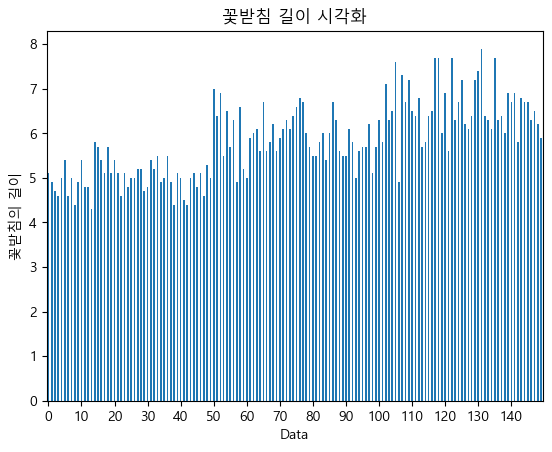

In [16]:
plt.rc('font',family = 'Malgun Gothic')
filename = r'C:\Users\user\Desktop\my_ws\edu\data_analysis\1023_pandas_mat\1023_file\iris.csv'
iris = pd.read_csv(filename)
iris.SepalLength[:].plot(kind='bar',rot = 0)
value = range(len(x))
plt.title("꽃받침 길이 시각화")
plt.xlabel("Data")
plt.ylabel("꽃받침의 길이")
plt.xticks(np.arange(0,150,10)) ##x축 설정하는 거 
plt.show()

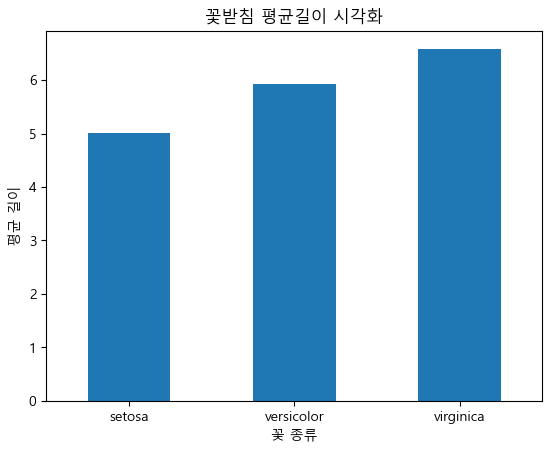

In [17]:
df2 = iris.groupby(iris['Species']).mean()
df2.SepalLength[:].plot(kind='bar',rot=0)
plt.ylabel("평균 길이")
plt.title("꽃받침 평균길이 시각화")
plt.xlabel("꽃 종류")
plt.show()

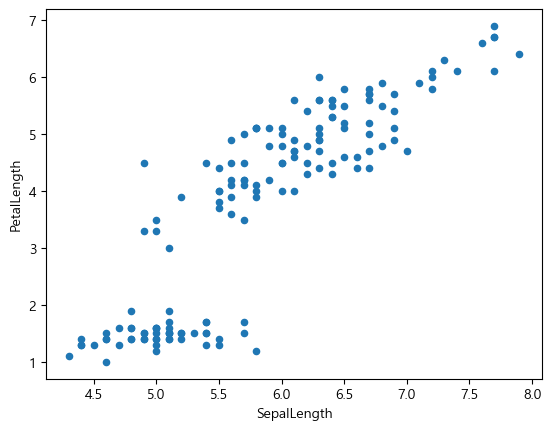

In [18]:
iris.plot(x='SepalLength',y='PetalLength',kind='scatter')
plt.show()

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

filename = r'C:\Users\user\Desktop\my_ws\edu\data_analysis\1023_pandas_mat\1023_file\train.csv'

train = pd.read_csv(filename,encoding='euc-kr')

train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
print(train.sort_values(by='Fare',ascending=False).head(5)) #정렬

print(train['Survived'].value_counts()) # 해당 항목 별 값 갯수

print(train.isnull().sum()) ##결측데이터 합 확인


     PassengerId  Survived  Pclass                                Name  \
258          259         1       1                    Ward, Miss. Anna   
737          738         1       1              Lesurer, Mr. Gustave J   
679          680         1       1  Cardeza, Mr. Thomas Drake Martinez   
88            89         1       1          Fortune, Miss. Mabel Helen   
27            28         0       1      Fortune, Mr. Charles Alexander   

        Sex   Age  SibSp  Parch    Ticket      Fare        Cabin Embarked  
258  female  35.0      0      0  PC 17755  512.3292          NaN        C  
737    male  35.0      0      0  PC 17755  512.3292         B101        C  
679    male  36.0      0      1  PC 17755  512.3292  B51 B53 B55        C  
88   female  23.0      3      2     19950  263.0000  C23 C25 C27        S  
27     male  19.0      3      2     19950  263.0000  C23 C25 C27        S  
0    549
1    342
Name: Survived, dtype: int64
PassengerId      0
Survived         0
Pclass        

In [21]:


train2 = train.fillna({'Age':train['Age'].mean(),'Embarked':train['Embarked'].mode()[0]})
train2 = train.drop('Cabin',axis=1)
train2


#train.fillna({'Age':train['Age'].mean(),'Embarked'})

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C
